# IMPORT LIBRARY

In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder


* We have loaded the necessary libraries above
* Now let's load the data

# IMPORT DATASET

In [3]:
data = load_wine(as_frame=True)
data

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [4]:
data.target

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [5]:
df = data.data.copy()  # features
# Look at the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)
# and save the label in a column called 'y' in df.
df['y'] = data.target ## YOUR CODE HERE # label
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
#How many samples and features are there?
# YOUR CODE HERE
n_sample = len(df)
n_features = len(df.columns)
print('number of samples:', n_sample, 'number of features:', n_features)

number of samples: 178 number of features: 14


In [7]:
# Quiz Q1
# How many instances are there for each class? 
# YOUR CODE HERE
print("class_0 =",len(df[df['y'] == 0]),"class_1 =",len(df[df['y'] == 1]),"class_2 =",len(df[df['y'] == 2]))



class_0 = 59 class_1 = 71 class_2 = 48


In [8]:
# Calculate the means, medians, and standard deviations of each feature
# YOUR CODE HERE
# median == 50%
df.describe()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


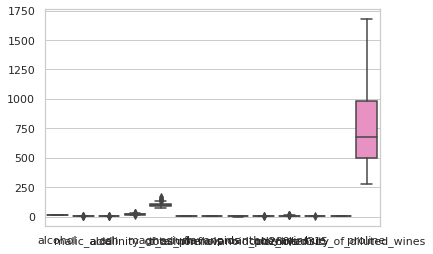

In [9]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
# Quiz Q2: Is there any feature that is in a clearly different scale than the others?

# YOUR CODE HERE
df_label = df[['y']]
df_features = df.loc[:, df.columns != 'y']
df_features

sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=df_features)

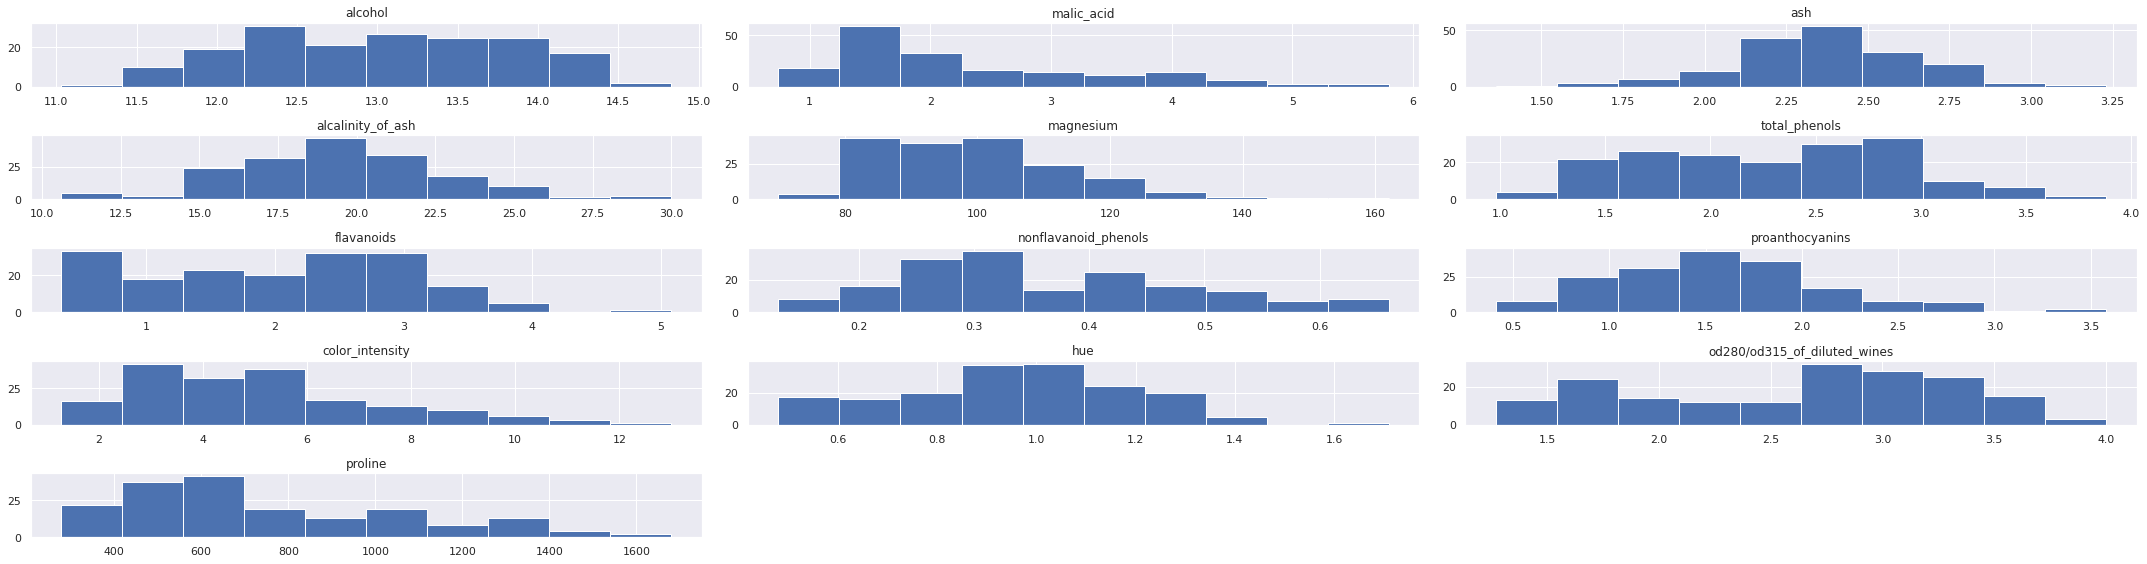

In [10]:
# Let's look at the distributions of values of our features. Draw a histogram for each of the features

# YOUR CODE HERE
sns.set(rc={'figure.figsize':(30,8)})

plt_figure = plt.figure()

for i, each_feature in enumerate(df_features.columns):
    position = plt_figure.add_subplot(5, 3, i+1)
    df_features[each_feature].hist(bins=10,ax=position)
    position.set_title(each_feature)
plt_figure.tight_layout()
plt.show()


Let's do some multivariate analysis

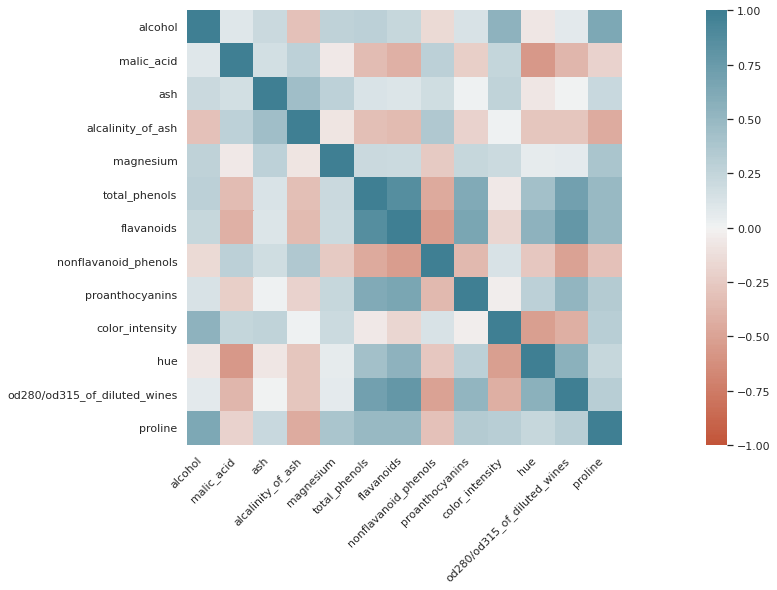

In [11]:
# Calculate the correlations between each pair of variables

# YOUR CODE HERE
correlation = df_features.corr()

# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)
# data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')

# YOUR CODE HERE
ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [12]:
# What is the highest correlation between features?
print("correlation_max_1",correlation.max(numeric_only=True))
except_corr_one = correlation[correlation != 1.0]
print("correlation_except_max_1",except_corr_one.max(numeric_only=True))
print('the highest correlation between feature is:',except_corr_one['total_phenols']['flavanoids'],except_corr_one['flavanoids']['total_phenols'])


correlation_max_1 alcohol                         1.0
malic_acid                      1.0
ash                             1.0
alcalinity_of_ash               1.0
magnesium                       1.0
total_phenols                   1.0
flavanoids                      1.0
nonflavanoid_phenols            1.0
proanthocyanins                 1.0
color_intensity                 1.0
hue                             1.0
od280/od315_of_diluted_wines    1.0
proline                         1.0
dtype: float64
correlation_except_max_1 alcohol                         0.643720
malic_acid                      0.292977
ash                             0.443367
alcalinity_of_ash               0.443367
magnesium                       0.393351
total_phenols                   0.864564
flavanoids                      0.864564
nonflavanoid_phenols            0.361922
proanthocyanins                 0.652692
color_intensity                 0.546364
hue                             0.565468
od280/od315_of_diluted_

You should have noticed that some of the features are highly correlated. 

For this reason, we can run into trouble when trying to train a classifier due to multicolinearity.

Let's do PCA on this dataset to remove these correlations

In [13]:
# Let's do PCA:
# HINT: I suggest you attempt Q5 of the quiz and then use the function you developed
#       in this and some of the following cells.
def std_pca(df, var=0.5):
    y_flag = False
    if 'y' in df:
      y = df['y']
      df = df.loc[:, df. columns != 'y']
      y_flag = True
    standard_transformer = StandardScaler()
    df = standard_transformer.fit_transform(df)
    pca = PCA(n_components=var, random_state=100)
    x_pca = pca.fit_transform(df)
    if y_flag:
      x_pca = np.column_stack((x_pca, y))
    return x_pca, pca


# 1. Standardise your data using a StandardScaler. Make sure you're not scaling the 'y'!

df_pca, pca = std_pca(df_features, var=2)# YOUR CODE HERE
# 2. Do PCA with 2 components. How much variance is retained from the original dataset?

pca.explained_variance_ratio_.cumsum()# YOUR CODE HERE

array([0.36198848, 0.55406338])

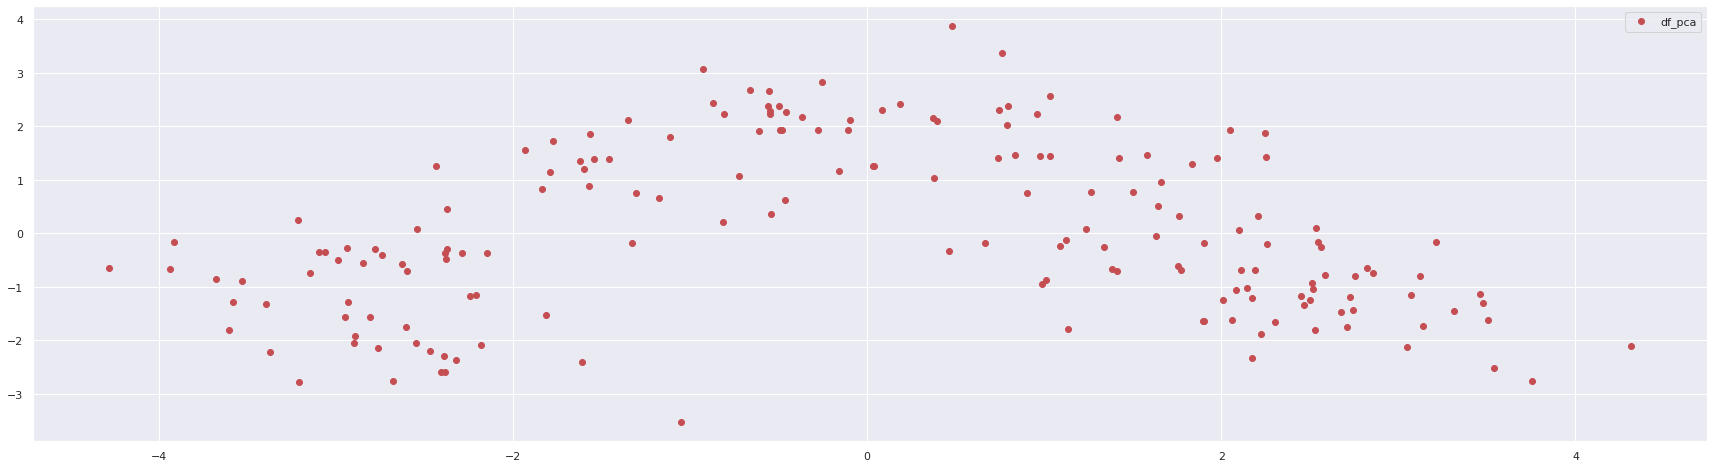

In [14]:
# Plot your two components, using the label from the data to colour the points

# YOUR CODE HERE

plt.scatter(df_pca[:,0], df_pca[:,1], c = "r", label = "df_pca")
plt.legend(ncol=1)

In [15]:
# How many components do you need to keep at least 85% of the variance in the dataset? (Q6)

# YOUR CODE HERE
pca_df, pca = std_pca(df_features, var=0.85)
pca.explained_variance_ratio_
# ans: len(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,0.04935823])) == 6
# ans

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823])

In [16]:
# How much variance is retained if we do PCA with 3 components? (Q7)

# YOUR CODE HERE
pca_df, pca = std_pca(df_features, var=3)
pca.explained_variance_ratio_.cumsum()


# pca_df, pca = std_pca(df_features, var=2)
# pca.explained_variance_ratio_.cumsum()
# len(pca_df)

array([0.36198848, 0.55406338, 0.66529969])

## Clustering

Let's see how many clusters does K-Means find.



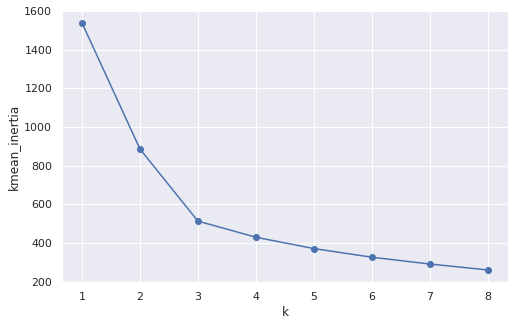

In [17]:
# Use the elbow method to select the number of clusters in your data using 3 PCs.
# YOUR CODE HERE
# n_clusters
# init k-means++
# n_init  10
# max_iter  300
# tol
list_initial = []
list_sil = []
for k in range(1, 9):
    # kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    k_means = KMeans(n_clusters = k)
    y_pred = k_means.fit_predict(pca_df)
    list_initial.append(k_means.inertia_)
    
    if k > 1:
      list_sil.append(silhouette_score(pca_df, y_pred))

plt.figure(figsize=(8,5))
plt.plot(range(1, 9), list_initial, 'o-')
plt.xlabel('k')
plt.ylabel('kmean_inertia')
plt.show()


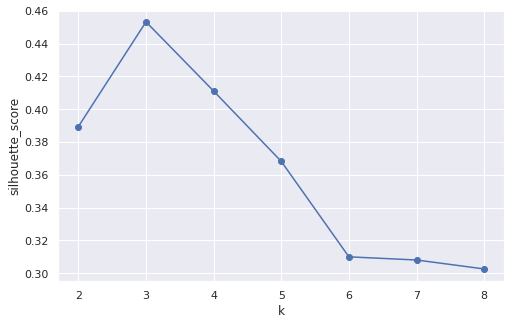

7


In [18]:
# Now use the silhouette score to choose between the two candidate k values from the previous cell

# YOUR CODE HERE
plt.figure(figsize=(8,5))
plt.plot(range(2, 9), list_sil, 'o-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.show()

print(len(list_sil))


In [19]:
# predict model
k_means = KMeans(n_clusters=3)
y_pred = k_means.fit_predict(pca_df)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

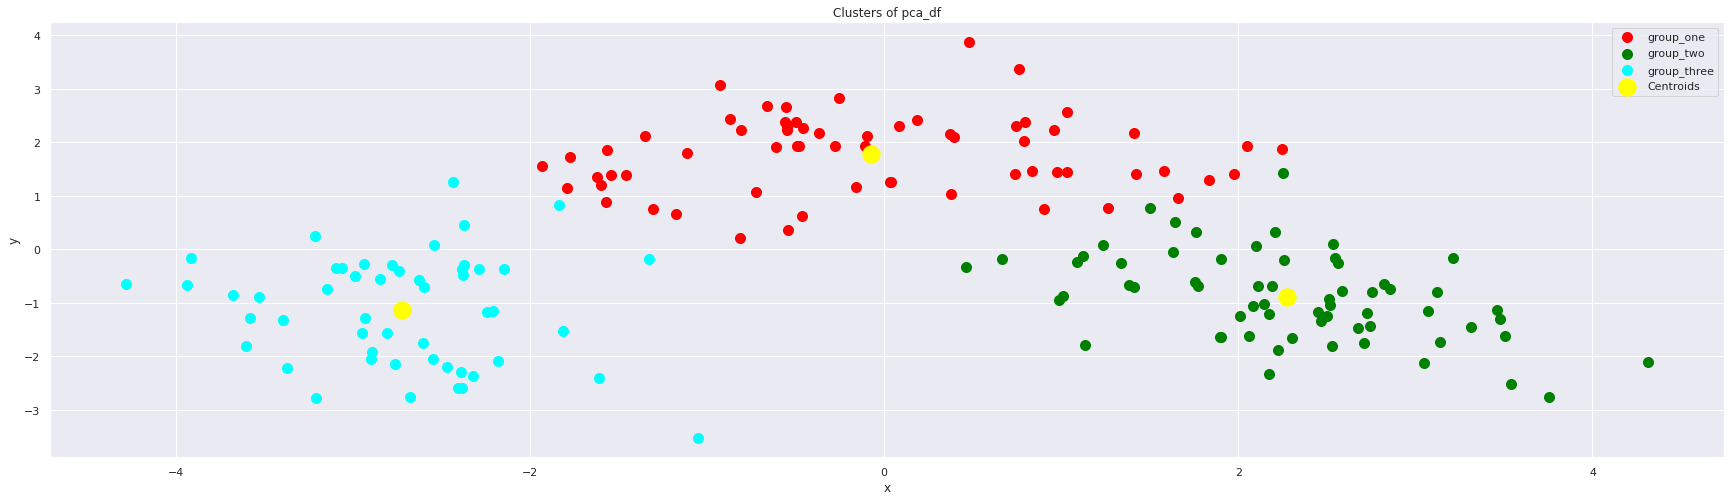

In [20]:
# .cluster_centers_ 

# .labels_

# .inertia_  (SSE) 


plt.scatter(pca_df[y_pred == 0, 0], pca_df[y_pred == 0, 1], s = 100, c = 'red', label = 'group_one')
plt.scatter(pca_df[y_pred == 1, 0], pca_df[y_pred == 1, 1], s = 100, c = 'green', label = 'group_two')
plt.scatter(pca_df[y_pred == 2, 0], pca_df[y_pred == 2, 1], s = 100, c = 'cyan', label = 'group_three')


plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of pca_df')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Now we can try to understand our clusters.

In [21]:
# In the original (before PCA and before standardisation) dataframe, add a column called 'cluster' that contains
# the cluster assignment from above
df['cluster'] = y_pred
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,2


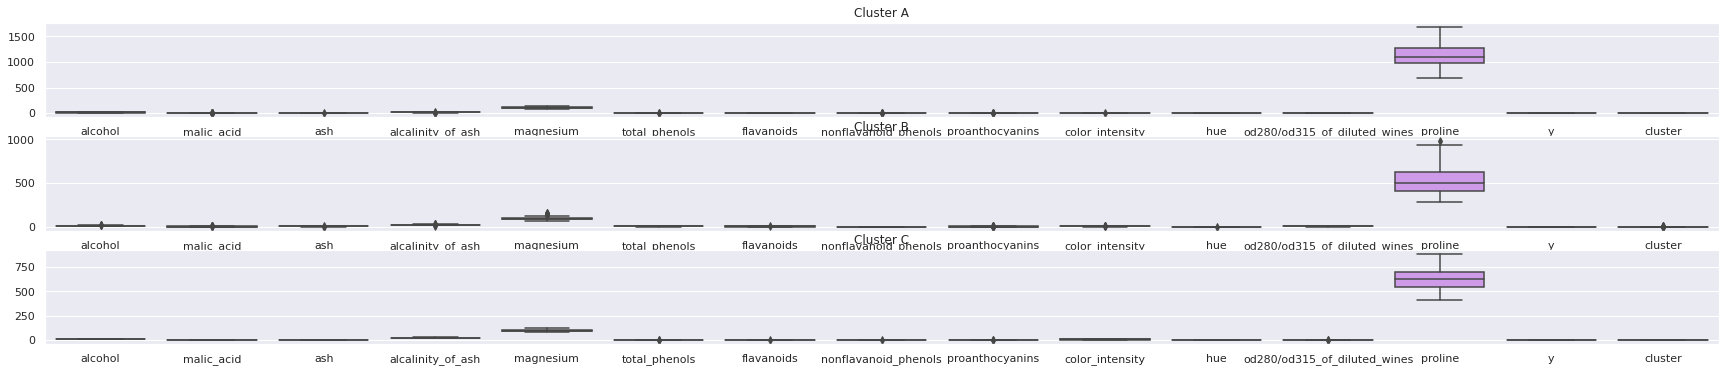

In [22]:
# Do a boxplot of each feature, separating between clusters


# # Clusters
cluster_A = df[df['y']==0]
cluster_B = df[df['y']==1]
cluster_C = df[df['y']==2]

for plot in range(1, 4):
  plt.subplot(4,1,plot)
  
  if plot == 1:
    sns.boxplot(data=cluster_A)
    plt.title('Cluster A')
  elif plot == 2:
    sns.boxplot(data=cluster_B)
    plt.title('Cluster B')
  elif plot == 3:
    sns.boxplot(data=cluster_C)
    plt.title('Cluster C')
  else:
    print(plot)

plt.show()

Write your observations here.
For example: is there a clear difference between the clusters in terms of alcohol content? What about flavanoids?